This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and the radio-frequency.

Statistical techniques such as scatter plot (with/without errorbar), ?-test will be used to compare the optical-to-radio offset at $S/X$-, $K-$, and $X/Ka$-band. 

- 1. $S/X$ vs. $K$

- 2. $S/X$ vs. $X/Ka$

- 3. $K$ vs. $X/Ka$

In [1]:
from astropy.table import Table, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Radio-to-optical data
r2o= Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

Considering the SI data

In [3]:
# SI data
# si_x = Table.read("../data/si_from_bvid.fits")
si_x = Table.read("../data/si_table_A.fits")

# Cross-match
r2o_si = join(r2o, si_x, keys="iers_name")

# SI > 3
mask = (r2o_si["si_c15"] >= 3)
r2o_si1 = r2o_si[mask]

mask = (r2o_si["si_c15"] < 3)
r2o_si2 = r2o_si[mask]

num1 = len(r2o_si)
num2 = len(r2o_si1)

print("Find structure index > 3 for {:d} ({:.0f}%) sources.".format(num2, num2/num1*100))

Find structure index > 3 for 228 (47%) sources.


# 1 S/X versus K

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatter plot with errorbar (S/X vs. K)


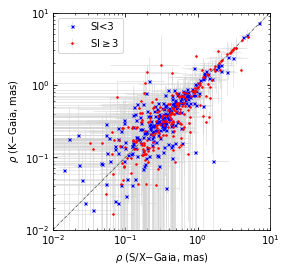

In [4]:
# Distribution of angular separation
fig, ax = plt.subplots(figsize=(4, 4))

x = np.linspace(0.01, 20, 100)
ax.plot(x, x, "k-.", lw=0.5)

ax.errorbar(r2o_si2["ang_sep_sx_cor"], r2o_si2["ang_sep_k_cor"], fmt="bx", ms=3,
            yerr=r2o_si2["ang_sep_err_k"],
            xerr=r2o_si2["ang_sep_err_sx"],
            elinewidth=0.5, ecolor="lightgrey", label="SI<3")
ax.errorbar(r2o_si1["ang_sep_sx_cor"], r2o_si1["ang_sep_k_cor"], fmt="r.", ms=3,
            yerr=r2o_si1["ang_sep_err_k"],
            xerr=r2o_si1["ang_sep_err_sx"],
            elinewidth=0.5, ecolor="lightgrey", label="SI$\geq$3")

ax.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax.set_ylabel("$\\rho$ (K$-$Gaia, mas)")

ax.axis("square")
ax.axis([0.01, 10, 0.01, 10])

ax.legend()

ax.set_xscale("log")
ax.set_yscale("log")

plt.tight_layout()
plt.savefig("../plots/rho-com-sx-k.eps")

print("Scatter plot with errorbar (S/X vs. K)")

Angular separation difference (K - SX)


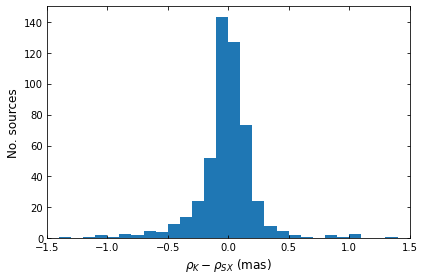

In [5]:
# Distribution of angular separation
fig, ax = plt.subplots(figsize=(6, 4))

# rho difference
dr_k_sx = r2o["ang_sep_k_cor"] - r2o["ang_sep_sx_cor"]

# Bin
bin_set = np.arange(-1.5, 1.6, 0.1)

ax.hist(dr_k_sx, bins=bin_set)

ax.set_xlabel("$\\rho_{K}-\\rho_{SX}$ (mas)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)

ax.axis([-1.5, 1.5, 0, 150])

plt.tight_layout()
print("Angular separation difference (K - SX)")

In [6]:
rho_lim = 0.5
mask = (np.fabs(dr_k_sx) > rho_lim)
num_huge = len(dr_k_sx[mask])

print("Number of sources with rho_K - rho_SX > {:.2f} mas is : {} ({:.0f}%)".
      format(rho_lim, num_huge, num_huge * 100.0 / len(dr_k_sx)))

Number of sources with rho_K - rho_SX > 0.50 mas is : 33 (6%)


In [7]:
rho_lim = 0.1
mask = (np.fabs(dr_k_sx) > rho_lim)
num_huge = len(dr_k_sx[mask])

print("Number of sources with rho_K - rho_SX > {:.2f} mas is : {} ({:.0f}%)".
      format(rho_lim, num_huge, num_huge * 100.0 / len(dr_k_sx)))

Number of sources with rho_K - rho_SX > 0.10 mas is : 242 (47%)


# 2 S/X versus X/Ka

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatter plot with errorbar (S/X vs. X/Ka)


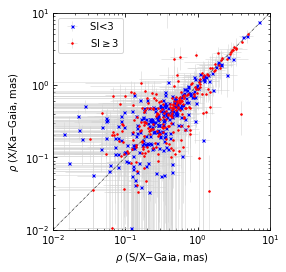

In [8]:
# Distribution of angular separation
fig, ax = plt.subplots(figsize=(4, 4))

x = np.linspace(0.01, 20, 100)
ax.plot(x, x, "k-.", lw=0.5)

ax.errorbar(r2o_si2["ang_sep_sx_cor"], r2o_si2["ang_sep_ka_cor"], fmt="bx", ms=3,
            yerr=r2o_si2["ang_sep_err_ka"],
            xerr=r2o_si2["ang_sep_err_sx"],
            elinewidth=0.5, ecolor="lightgrey", label="SI<3 ")
ax.errorbar(r2o_si1["ang_sep_sx_cor"], r2o_si1["ang_sep_ka_cor"], fmt="r.", ms=3,
            yerr=r2o_si1["ang_sep_err_ka"],
            xerr=r2o_si1["ang_sep_err_sx"],
            elinewidth=0.5, ecolor="lightgrey", label="SI$\geq$3")

ax.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")

ax.axis("square")
ax.axis([0.01, 10, 0.01, 10])

ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()

plt.tight_layout()
plt.savefig("../plots/rho-com-sx-ka.eps")

print("Scatter plot with errorbar (S/X vs. X/Ka)")

Angular separation difference (XKa - SX)


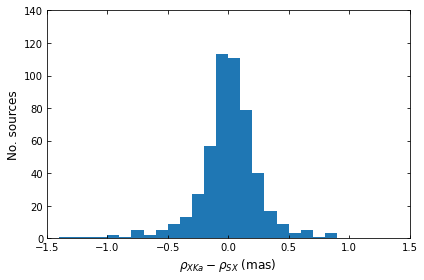

In [9]:
# Distribution of angular separation
fig, ax = plt.subplots(figsize=(6, 4))

# rho difference
dr_ka_sx = r2o["ang_sep_ka_cor"] - r2o["ang_sep_sx_cor"]

# Bin
bin_set = np.arange(-1.5, 1.5, 0.1)

ax.hist(dr_ka_sx, bins=bin_set)

ax.set_xlabel("$\\rho_{XKa}-\\rho_{SX}$ (mas)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)

ax.axis([-1.5, 1.5, 0, 140])

plt.tight_layout()
print("Angular separation difference (XKa - SX)")

In [10]:
rho_lim = 0.5
mask = (np.fabs(dr_ka_sx) > rho_lim)
num_huge = len(dr_ka_sx[mask])

print("Number of sources with rho_XKa - rho_SX > {:.2f} mas is : {} ({:.0f}%)".
      format(rho_lim, num_huge, num_huge * 100.0 / len(dr_ka_sx)))

Number of sources with rho_XKa - rho_SX > 0.50 mas is : 37 (7%)


# 3 K versus X/Ka

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatter plot with errorbar (K vs. X/Ka)


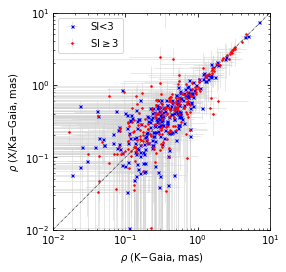

In [11]:
# Distribution of angular separation
fig, ax = plt.subplots(figsize=(4, 4))

x = np.linspace(0.01, 20, 100)
ax.plot(x, x, "k-.", lw=0.5)

ax.errorbar(r2o_si2["ang_sep_k_cor"], r2o_si2["ang_sep_ka_cor"],
            fmt="bx", ms=3,
            yerr=r2o_si2["ang_sep_err_ka"],
            xerr=r2o_si2["ang_sep_err_k"],
            elinewidth=0.5, ecolor="lightgrey", label="SI<3")
ax.errorbar(r2o_si1["ang_sep_k_cor"], r2o_si1["ang_sep_ka_cor"],
            fmt="r.", ms=3,
            yerr=r2o_si1["ang_sep_err_ka"],
            xerr=r2o_si1["ang_sep_err_k"],
            elinewidth=0.5, ecolor="lightgrey", label="SI$\geq$3")
            
ax.set_xlabel("$\\rho$ (K$-$Gaia, mas)")
ax.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")

ax.axis("square")
ax.axis([0.01, 10, 0.01, 10])

ax.legend()

ax.set_xscale("log")
ax.set_yscale("log")

plt.tight_layout()
plt.savefig("../plots/rho-com-k-ka.eps")

print("Scatter plot with errorbar (K vs. X/Ka)")

Angular separation difference (XKa - K)


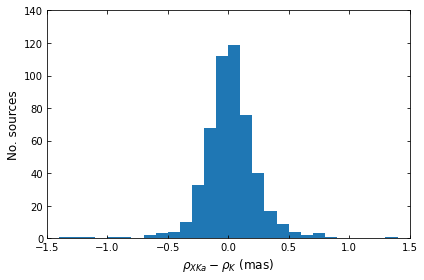

In [12]:
# Distribution of angular separation
fig, ax = plt.subplots(figsize=(6, 4))

# rho difference
dr_ka_k = r2o["ang_sep_ka_cor"] - r2o["ang_sep_k_cor"]

# Bin
bin_set = np.arange(-1.5, 1.5, 0.1)
ax.hist(dr_ka_k, bins=bin_set)

ax.set_xlabel("$\\rho_{XKa}-\\rho_{K}$ (mas)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)

ax.axis([-1.5, 1.5, 0, 140])

plt.tight_layout()
print("Angular separation difference (XKa - K)")

In [13]:
rho_lim = 0.5
mask = (np.fabs(dr_ka_k) > rho_lim)
num_huge = len(dr_ka_k[mask])

print("Number of sources with rho_XKa - rho_K > {:.2f} mas is : {} ({:.0f}%)".
      format(rho_lim, num_huge, num_huge * 100.0 / len(dr_ka_k)))

Number of sources with rho_XKa - rho_K > 0.50 mas is : 24 (5%)


Sign test

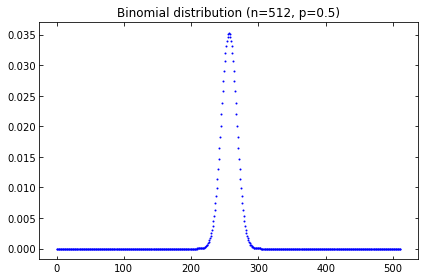

In [14]:
from scipy.stats import binom

n, p = 512, 0.5
rv = binom(n, p)

x = np.arange(n)

fig, ax = plt.subplots(1, 1)

ax.plot(x, rv.pmf(x), "bo", ms=1, label="binom pmf")
ax.set_title("Binomial distribution (n={}, p={})".format(n, p))

plt.tight_layout()

In [15]:
# Count the number of negative rho difference
# K vs. SX
num_neg_k_sx = len(dr_k_sx[dr_k_sx < 0])
alpha_k_sx = rv.cdf(num_neg_k_sx)

# XKa vs. sx
num_neg_ka_sx = len(dr_ka_sx[dr_ka_sx < 0])
alpha_ka_sx = rv.cdf(num_neg_ka_sx)

# XKa vs. K
num_neg_ka_k = len(dr_ka_k[dr_ka_k < 0])
alpha_ka_k = rv.cdf(num_neg_ka_k)

print("Hypothesis testing, H0: rho(XKa) < rho(K) < rho(SX)")
print("          #Negative   alpha   p-value")
print("K - SX    {}         {:.1e}   {:.2f}".format(num_neg_k_sx, alpha_k_sx, 1-alpha_k_sx))
print("XKa - SX  {}         {:.1e}   {:.2f}".format(num_neg_ka_sx, alpha_ka_sx, 1-alpha_ka_sx))
print("XKa - K   {}         {:.1e}   {:.2f}".format(num_neg_ka_k, alpha_ka_k, 1-alpha_ka_k))

Hypothesis testing, H0: rho(XKa) < rho(K) < rho(SX)
          #Negative   alpha   p-value
K - SX    263         7.5e-01   0.25
XKa - SX  239         7.2e-02   0.93
XKa - K   237         5.1e-02   0.95


Now I wan to test if $\rho_{K}>\rho_{SX}$

In [16]:
num_pos_k_sx = n - num_neg_k_sx
alpha_k_sx = rv.cdf(num_pos_k_sx)

print("H0: rho(K) > rho(SX)")
print("#postive =", num_pos_k_sx)
print("alpha = {:.1e}".format(alpha_k_sx))
print("p     = {:.2f}".format(1-alpha_k_sx))

H0: rho(K) > rho(SX)
#postive = 249
alpha = 2.8e-01
p     = 0.72


In [17]:
dr_k_sx1 = r2o_si1["ang_sep_k_cor"] - r2o_si1["ang_sep_sx_cor"]
dr_ka_sx1 = r2o_si1["ang_sep_ka_cor"] - r2o_si1["ang_sep_sx_cor"]
dr_ka_k1 = r2o_si1["ang_sep_ka_cor"] - r2o_si1["ang_sep_k_cor"]

rv1 = binom(num2, p)

In [18]:
# Count the number of negative rho difference
# K vs. SX
num_neg_k_sx1 = len(dr_k_sx1[dr_k_sx1 < 0])
alpha_k_sx1 = rv1.cdf(num_neg_k_sx1)

# XKa vs. sx
num_neg_ka_sx1 = len(dr_ka_sx1[dr_ka_sx1 < 0])
alpha_ka_sx1 = rv1.cdf(num_neg_ka_sx1)

# XKa vs. K
num_neg_ka_k1 = len(dr_ka_k1[dr_ka_k1 < 0])
alpha_ka_k1 = rv1.cdf(num_neg_ka_k1)

print("Hypothesis testing, H0: rho(XKa) < rho(K) < rho(SX)")
print("          #positive   alpha   p-value")
print("K - SX    {:3d}         {:.1e}   {:.4f}".format(num_neg_k_sx1, alpha_k_sx1, 1-alpha_k_sx1))
print("XKa - SX  {:3d}         {:.1e}   {:.2f}".format(num_neg_ka_sx1, alpha_ka_sx1, 1-alpha_ka_sx1))
print("XKa - K   {:3d}         {:.1e}   {:.2f}".format(num_neg_ka_k1, alpha_ka_k1, 1-alpha_ka_k1))

Hypothesis testing, H0: rho(XKa) < rho(K) < rho(SX)
          #positive   alpha   p-value
K - SX    136         1.0e+00   0.0014
XKa - SX  103         8.2e-02   0.92
XKa - K    99         2.7e-02   0.97
